### Hidden Markov Model
- Statistical model that can be used to describe the evolution of observable events that depend on internal factors, which are not directly observable.
<br>

#### HMM State Transitions
- Number of states (Hyperparameter, can be chosen using cross-validation)
- Long periods of low volatility, shorter periods of high volatility

#### State Transitions Probailities
- Gerneric States: z(t) ∈ {1, 2, ..., M}
<br>

> p(z(t + 1) = j | z(t) = i)

- State transitions probailities don't depend on time, they will be constant
- Total number of probabilities = M x M
- We can store these probabilities in a matrix

> p(z(t + 1) = j | z(t) = i) = A<sub>ij</sub>

#### Training HMM Intuition
|   L   |   L   | L     | H  | H  | H  | L  | L  | L  | L |
|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|
|  0.1  | -0.05 | 0.02 | 0.3 | -0.5 | 0.4 | -0.01 | -0.08 | 0.06 | -0.02 |

Transition Probabilities Matrix A:
<br>

[
    [5/6, 1/6], 
    <br>
    [1/3, 2/3]
]

For low, data is: {0.1, -0.05, 0.02, -0.01, -0.08, 0.06, -0.02}
- N(Mean=0.002857, Var=0.003335)
<br>

For high, data is: {0.3, -0.5, 0.4}
- N(Mean=0.066667, Var=0.16222)

#### Tasks of HMM
1) Find p(x)
<br>
2) Maximize p(x)
<br>
3) Decoding (Inference)

### Why Sequence Models ?
- Want to model regime switching because we know volatility clustering exists
- GMM is a stationary model, but non-stationary model is more accurate
- HMM = GMM + Time element + fat tail

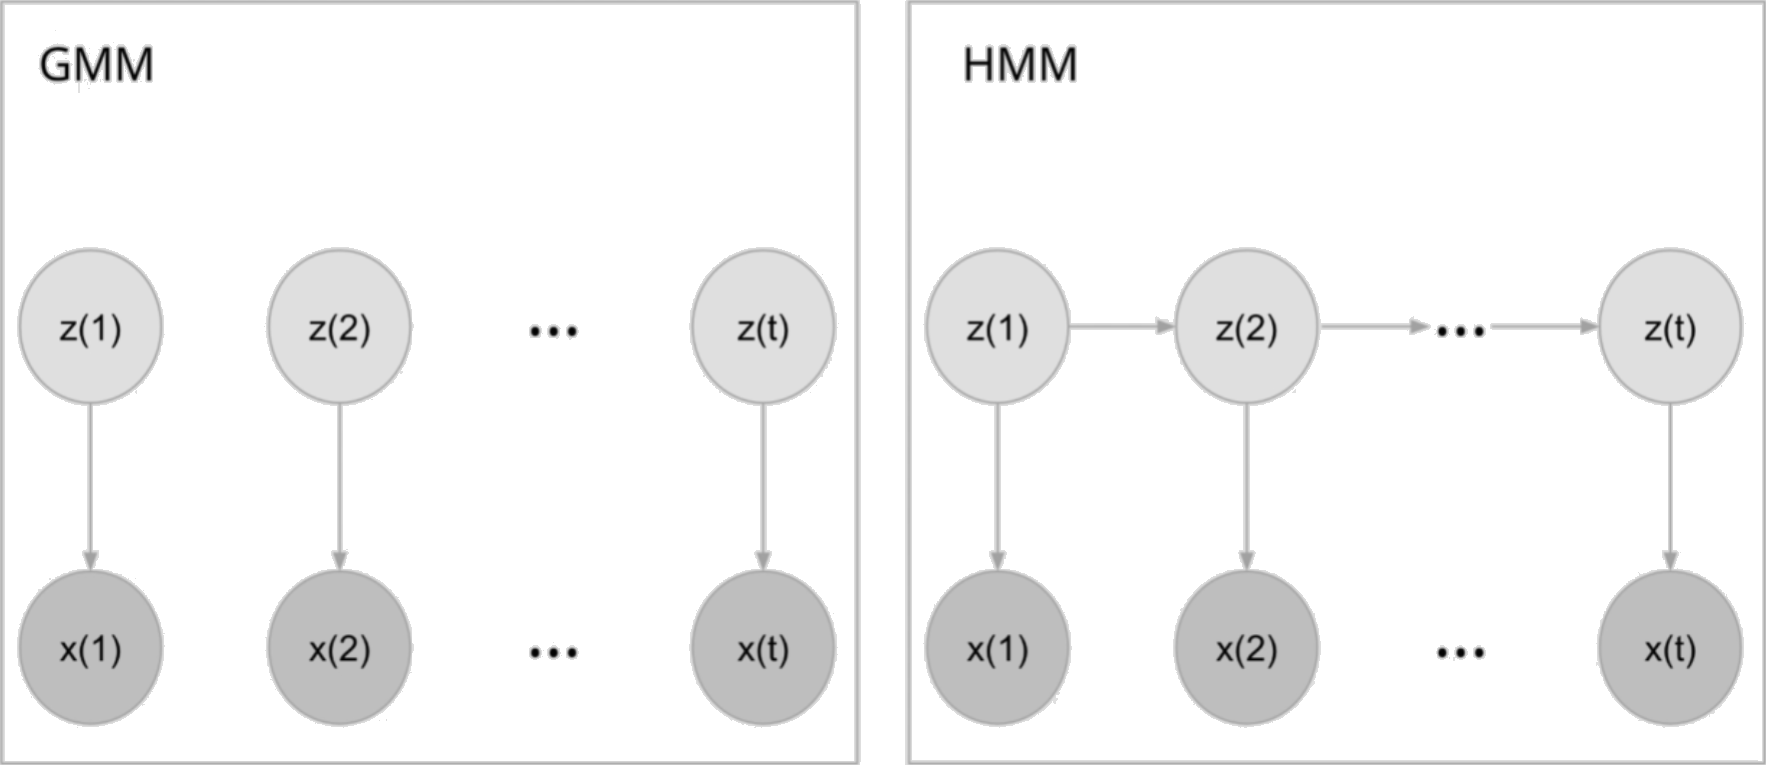

In [3]:
from hmmlearn import hmm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(1)

In [26]:
df = pd.read_csv('SPY.csv', index_col='Date', parse_dates=True)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,112.370003,113.389999,111.510002,113.330002,92.246048,118944600
2010-01-05,113.260002,113.680000,112.849998,113.629997,92.490204,111579900
2010-01-06,113.519997,113.989998,113.430000,113.709999,92.555328,116074400
2010-01-07,113.500000,114.330002,113.180000,114.190002,92.946060,131091100
2010-01-08,113.889999,114.620003,113.660004,114.570000,93.255348,126402800


In [27]:
returns = np.log(df['Close']).diff().dropna()

<AxesSubplot:>

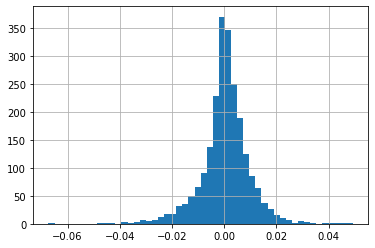

In [28]:
returns.hist(bins=50)

In [29]:
X = returns.to_numpy().reshape(-1, 1)

model = hmm.GaussianHMM(
    n_components=2,         # High and Low
    covariance_type="diag"
)

model.fit(X)

GaussianHMM(n_components=2)

In [30]:
Z = model.predict(X)

In [31]:
Z

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

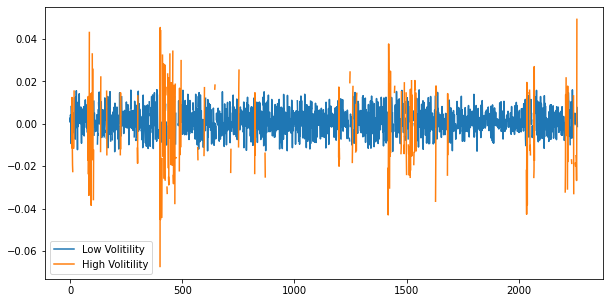

In [32]:
# we want to draw different segments in different colors according to state
fig, ax = plt.subplots(figsize=(10, 5))

# first create arrays with nan
returns0 = np.empty(len(Z))
returns1 = np.empty(len(Z))
returns0[:] = np.nan
returns1[:] = np.nan

# fill in the values only if the state is the one correspoding to the array
returns0[Z == 0] = returns[Z == 0]
returns1[Z == 1] = returns[Z == 1]
plt.plot(returns0, label='Low Volitility')
plt.plot(returns1, label='High Volitility')
plt.legend()

According to the plot, regimes are not condensed enough.

In [33]:
# Transition Matrix
model.transmat_

array([[0.7579454 , 0.2420546 ],
       [0.54731232, 0.45268768]])

State 0 -> State 0: 0.7579454 
<br>
State 0 -> State 1: 0.2420546
<br>
State 1 -> State 0: 0.54731232 
<br>
State 1 -> State 1: 0.45268768

In [22]:
# Try to set the transition matrix intuitively
# Since the probabilities of switching states are very low, the regimes should be more condensed.
model.transmat_ = np.array([
    [0.999, 0.001], 
    [0.0001, 0.9999]
])

In [23]:
# Run inference again
Z = model.predict(X)

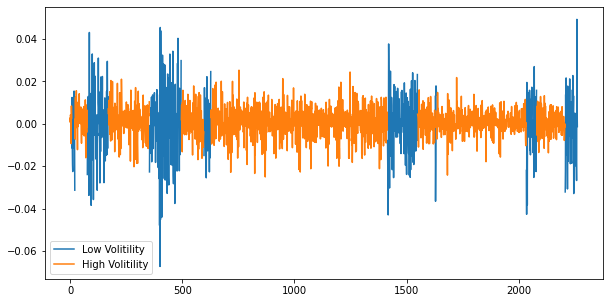

In [24]:
# we want to draw different segments in different colors according to state
fig, ax = plt.subplots(figsize=(10, 5))

# first create arrays with nan
returns0 = np.empty(len(Z))
returns1 = np.empty(len(Z))
returns0[:] = np.nan
returns1[:] = np.nan

# fill in the values only if the state is the one correspoding to the array
returns0[Z == 0] = returns[Z == 0]
returns1[Z == 1] = returns[Z == 1]
plt.plot(returns0, label='Low Volitility')
plt.plot(returns1, label='High Volitility')
plt.legend()

From the plots, we can see that stock return volitility tends to stay in the same regime.